In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
mu = -0.01
tau = 0.1
sigma = 5.

-0.000551956885819281 0.006221872255958161 4.012352386816238


## Symmetric Solutions

In [4]:
def calculate_symm_production_function(N,I_0):
    mc_samples = 500_000
    n = N/I_0

    weight = tau**2/((sigma**2)/n + tau**2)

    data = weight* np.random.normal(mu,np.sqrt(tau**2 + (sigma**2)/n),size = (mc_samples, I_0)) + (1-weight)*mu
    return np.maximum(0,np.max(data, axis = 1).astype(float)).mean()

In [5]:
N_range = np.arange(100_000_000, 300_000_000, 50_000_000)
I_range = np.arange(1, 200, 5)
res = np.zeros((len(N_range), len(I_range)))

# Calculate results
for j in range(len(N_range)):
    for i in range(len(I_range)):
        res[j, i] = calculate_symm_production_function(N_range[j], I_range[i])


<Figure size 640x480 with 0 Axes>

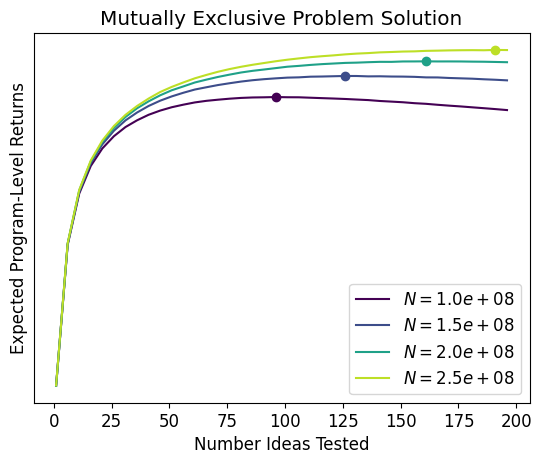

In [12]:
from matplotlib.colors import LinearSegmentedColormap
# Plot results and find maximum points
plt.figure()

# Use the magma colormap
cmap = plt.get_cmap('viridis')

# Plot results and find maximum points
plt.figure()

for j in range(len(N_range)):
    color = cmap(-0.1 + j / (len(N_range) - 1))  # Use the PuRd colormap
    plt.plot(I_range, res[j, :], label=f"$N = {N_range[j]:.1e}$", color=color)
    max_idx = np.argmax(res[j, :])
    max_I = I_range[max_idx]
    max_res = res[j, max_idx]
    
    # Plot the maximum point
    plt.plot(max_I, max_res, 'o', color=color)

plt.rcParams['font.size'] = 12
plt.xlabel("Number Ideas Tested")
plt.ylabel("Expected Program-Level Returns")

plt.yticks([])

#plt.tick_params(axis='y', labelleft=False)  # Remove y labels
plt.title("Mutually Exclusive Problem Solution")
plt.legend()
plt.savefig("../../figures/mut_excl_num_ideas_solution.pdf")  # Adjust the path if needed
plt.show()

In [11]:
def calculate_symm_production_function_approx(N,I_0):
    mc_samples = 50_000
    n = N/I_0

    weight = tau**2/((sigma**2)/n + tau**2)

    data = weight* np.random.normal(mu,np.sqrt(tau**2 + (sigma**2)/n),size = (mc_samples, I_0)) + (1-weight)*mu
    return np.maximum(-100,np.max(data, axis = 1).astype(float)).mean()

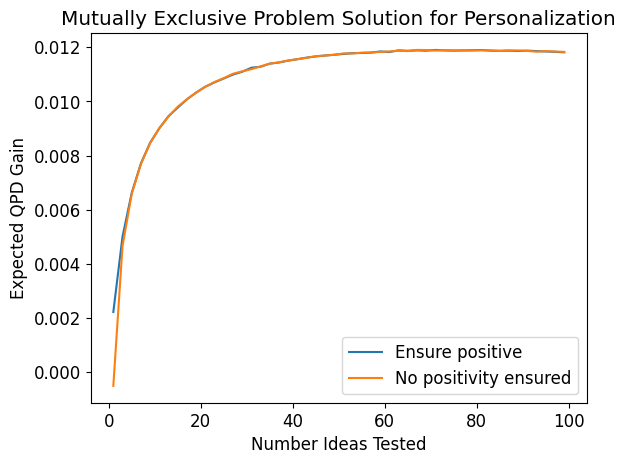

In [78]:
N = 250_000_000
I_range = np.arange(1,100,2)
res = np.zeros((2,len(I_range)))

for i in range(len(I_range)):
    res[0,i] = calculate_symm_production_function(N,I_range[i])
    res[1,i] = calculate_symm_production_function_approx(N,I_range[i])

plt.plot(I_range, res[0,:], label = f"")
plt.plot(I_range, res[1,:], label = f"Approximation")
plt.xlabel("Number Ideas Tested")
plt.ylabel("Expected QPD Gain")
plt.title(f"Mutually Exclusive Problem Solution for {names[program]}")

plt.legend()
#plt.savefig(f"../../figures/mut_excl_num_ideas_{names[program]}")
plt.show()